In [3]:
%pip install statsmodel
%pip install pingouin
%pip install seaborn
%pip install matplotlib
%pip install pandas
%pip install numpy

from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel

[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df_no_latency = pd.read_pickle("preprocessed_data/preprocessed_no_latency.pkl")
df_with_latency = pd.read_pickle("preprocessed_data/preprocessed_with_latency.pkl")

In [5]:
def visualize_anova_results(df, key, key_label, title, showErrorBars=True):
    grouped_data = df.groupby(['previouscongruency', 'currentcongruency'])[key].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.set_style('whitegrid')

    # Define markers and lines for current congruency
    markers = ['o', 's']
    linestyles = ['-', '--']
    colors = ['blue', 'red']
    labels = ['Current: Congruent', 'Current: Incongruent']

    x_mapping = {1: 0, 0: 1}

    # Create the plot
    for i, current in enumerate([1, 0]):
        subset = grouped_data[grouped_data['currentcongruency'] == current]
        subset = subset.sort_values('previouscongruency', ascending=False)
        x_values = [x_mapping[prev] for prev in subset['previouscongruency']]

        plt.plot(x_values, subset[key], 
                marker=markers[i], linestyle=linestyles[i], color=colors[i], 
                linewidth=2, markersize=10, label=labels[i])

    # Customize x-axis
    plt.xticks([0, 1], ['Congruent', 'Incongruent'])
    plt.xlabel('Previous Congruency', fontsize=14)
    plt.ylabel(key_label, fontsize=14)
    plt.title(f'{title}', fontsize=16)
    plt.legend(loc='best', fontsize=12)

    # Add error bars (standard error)
    if showErrorBars:
        for i, current in enumerate([1, 0]):
            for j, previous in enumerate([1, 0]):
                subset = df[(df['currentcongruency'] == current) & (df['previouscongruency'] == previous)]
                mean = subset[key].mean()
                se = subset[key].std() / np.sqrt(len(subset))
                plt.errorbar(x_mapping[previous], mean, yerr=se, fmt='none', capsize=5, 
                            ecolor=colors[i], alpha=0.7)

    # Adjust layout
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
import numpy as np
import pandas as pd

In [6]:
# für curvature
def calculate_curvature_horizontal(xpos, ypos):
    start = np.array([xpos[0], ypos[0]])
    end = np.array([xpos[-1], ypos[-1]])
    
    # geraden
    straight_line_x = np.linspace(start[0], end[0], len(xpos))  # Normierte x werte
    straight_line_y = np.linspace(start[1], end[1], len(ypos))  # Normierte y werte. braucht man hier aber ned
    
    curvature = 0
    for x, x_line in zip(xpos, straight_line_x):
        distance = abs(x - x_line)
        curvature += distance
    
    return curvature

# Berechnung der Trajektorienlänge
def calculate_trajectory_length(xpos, ypos):
    return sum(np.sqrt((xpos[i+1] - xpos[i])**2 + (ypos[i+1] - ypos[i])**2) for i in range(len(xpos)-1))

def visualize_anova_results_combined(df1, df2, key, key_label, title1, title2, main_title, showErrorBars=True):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.set_style('whitegrid')

    # Define visual elements
    markers = ['o', 's']
    linestyles = ['-', '--']
    colors = ['blue', 'red']
    labels = ['Current: Congruent', 'Current: Incongruent']
    x_mapping = {1: 0, 0: 1}

    # Function to plot on a specific axis
    def plot_on_axis(df, ax, subplot_title):
        grouped_data = df.groupby(['previouscongruency', 'currentcongruency'])[key].mean().reset_index()
        
        # Create the plot for each current congruency value
        for i, current in enumerate([1, 0]):
            subset = grouped_data[grouped_data['currentcongruency'] == current]
            subset = subset.sort_values('previouscongruency', ascending=False)
            x_values = [x_mapping[prev] for prev in subset['previouscongruency']]
            
            ax.plot(x_values, subset[key], 
                    marker=markers[i], linestyle=linestyles[i], color=colors[i], 
                    linewidth=2, markersize=10, label=labels[i])
        
        # Add error bars if requested
        if showErrorBars:
            for i, current in enumerate([1, 0]):
                for j, previous in enumerate([1, 0]):
                    subset = df[(df['currentcongruency'] == current) & (df['previouscongruency'] == previous)]
                    mean = subset[key].mean()
                    se = subset[key].std() / np.sqrt(len(subset))
                    ax.errorbar(x_mapping[previous], mean, yerr=se, fmt='none', capsize=5, 
                                ecolor=colors[i], alpha=0.7)
    
        # Customize axis
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['Congruent', 'Incongruent'])
        ax.set_xlabel('Previous Congruency', fontsize=12)
        ax.set_title(subplot_title, fontsize=14)
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend(loc='best', fontsize=10)
    
    # Plot on each axis
    plot_on_axis(df1, axes[0], title1)
    plot_on_axis(df2, axes[1], title2)
    
    # Add common y-axis label to the left subplot only
    axes[0].set_ylabel(key_label, fontsize=14)
    
    # Add a main title
    fig.suptitle(main_title, fontsize=16, y=1.02)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the combined figure
    plt.show()
    
    return fig

def visualize_trajectories(df1, df2, title1, title2):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    plt.figure(figsize=(10, 8))

    def plot_on_axis(df, ax, subplot_title):
        for index, row in df.iterrows():
            xpos = row['xpos']
            ypos = row['ypos']
            
            start = [xpos[0], ypos[0]]
            end = [xpos[-1], ypos[-1]]
            
            straight_line_x = np.linspace(start[0], end[0], len(xpos))
            straight_line_y = np.linspace(start[1], end[1], len(ypos))
            
            ax.plot(straight_line_x, straight_line_y, linestyle='--', alpha=0.5, label=f'Trial {index+1}' if index < 5 else "")

            #ax.set_xticks([0, 1])
            #ax.set_xticklabels(['Congruent', 'Incongruent'])
            ax.set_xlabel('x-position', fontsize=12)
            ax.set_title(subplot_title, fontsize=14)
            ax.grid(True, linestyle='--', alpha=0.7)
            #ax.legend(loc='best', fontsize=10)

    plot_on_axis(df1, axes[0], title1)
    plot_on_axis(df2, axes[1], title2)

    # Add common y-axis label to the left subplot only
    axes[0].set_ylabel("y-position", fontsize=14)
    
    # Add a main title
    fig.suptitle('Trajectory Lines for both conditions', fontsize=16, y=1.02)
    
    # Adjust layout
    plt.tight_layout()
    
    plt.show()



In [7]:
import numpy as np
import pandas as pd

def calculate_curvature(row):
    """
    Calculate the curvature of a trajectory, defined as the area between
    the trajectory and a straight line from start to end point.
    Works with normalized coordinates that may include negative values.
    
    Parameters:
    row: DataFrame row containing 'xpos' and 'ypos' lists
    
    Returns:
    float: The curvature value
    """
    # Extract x and y coordinates
    x = np.array(row['xpos'])
    y = np.array(row['ypos'])
    
    # Get start and end points
    start_x, start_y = x[0], y[0]
    end_x, end_y = x[-1], y[-1]
    
    # Create a straight line between start and end points
    t = np.linspace(0, 1, len(x))
    straight_x = start_x + t * (end_x - start_x)
    straight_y = start_y + t * (end_y - start_y)
    
    # Calculate the perpendicular distance from each point to the straight line
    # If start and end points are the same (or very close), handle specially
    if np.isclose(start_x, end_x) and np.isclose(start_y, end_y):
        # In this case, calculate distance from each point to this point
        distances = np.sqrt((x - start_x)**2 + (y - start_y)**2)
    else:
        # Calculate perpendicular distances using the standard formula
        # Line equation: ax + by + c = 0
        a = end_y - start_y
        b = start_x - end_x
        c = end_x * start_y - start_x * end_y
        
        # Distance from point to line: |ax + by + c| / sqrt(a^2 + b^2)
        norm = np.sqrt(a**2 + b**2)
        distances = np.abs(a * x + b * y + c) / norm
    
    # Calculate the area using the trapezoid rule (updated from trapz)
    area = np.abs(np.trapezoid(distances, x=t))
    
    return area

# Method 1: Z-score normalization (within-participant)
def normalize_within_participant(df):
    # Group by participant
    participant_groups = df.groupby('participant_num')
    
    # Apply z-score normalization within each participant
    normalized_df = pd.DataFrame()
    for participant, group in participant_groups:
        # Calculate z-scores for this participant's curvature values
        group_normalized = group.copy()
        group_normalized['curvature_normalized'] = (
            (group['curvature'] - group['curvature'].mean()) / group['curvature'].std()
        )
        normalized_df = pd.concat([normalized_df, group_normalized])
    
    return normalized_df

In [8]:
# Apply the function to each row in the DataFrame
df_no_latency['curvature'] = df_no_latency.apply(calculate_curvature, axis=1)
df_with_latency['curvature'] = df_with_latency.apply(calculate_curvature, axis=1)

In [9]:
df_no_latency = normalize_within_participant(df_no_latency)
df_with_latency = normalize_within_participant(df_with_latency)

## 3 Way ANOVA

In [10]:
df_combined = pd.concat([df_with_latency, df_no_latency])
df_combined_aggregated = df_combined.groupby(['participant_num', 'currentcongruency', 'previouscongruency', 'latency'])['curvature_normalized'].mean().reset_index()

In [11]:
aovrm = AnovaRM(df_combined_aggregated, 'curvature_normalized', 'participant_num', within=['latency', 'currentcongruency', 'previouscongruency'])
anova_res = aovrm.fit()

print(anova_res.summary())

                                  Anova
                                             F Value Num DF  Den DF Pr > F
--------------------------------------------------------------------------
latency                                       0.0258 1.0000 15.0000 0.8746
currentcongruency                            93.8951 1.0000 15.0000 0.0000
previouscongruency                           92.4837 1.0000 15.0000 0.0000
latency:currentcongruency                     9.6778 1.0000 15.0000 0.0072
latency:previouscongruency                    2.8324 1.0000 15.0000 0.1131
currentcongruency:previouscongruency         76.8692 1.0000 15.0000 0.0000
latency:currentcongruency:previouscongruency  4.1006 1.0000 15.0000 0.0610



In [12]:
# Extract and print p-values specifically
print("\nANOVA Results - Congruency and Latency on Curvature:")
print("-" * 50)
results_df = anova_res.anova_table
print(f"Latency Effect: F({results_df.loc['latency', 'Num DF']:.1f}, {results_df.loc['latency', 'Den DF']:.1f}) = {results_df.loc['latency', 'F Value']:.2f}, p = {results_df.loc['latency', 'Pr > F']:.8f}")
print(f"Current Congruency Effect: F({results_df.loc['currentcongruency', 'Num DF']:.1f}, {results_df.loc['currentcongruency', 'Den DF']:.1f}) = {results_df.loc['currentcongruency', 'F Value']:.2f}, p = {results_df.loc['currentcongruency', 'Pr > F']:.8f}")
print(f"Previous Congruency Effect: F({results_df.loc['previouscongruency', 'Num DF']:.1f}, {results_df.loc['previouscongruency', 'Den DF']:.1f}) = {results_df.loc['previouscongruency', 'F Value']:.2f}, p = {results_df.loc['previouscongruency', 'Pr > F']:.6f}")
print(f"Interaction Effect of latency and previous congruency: F({results_df.loc['latency:previouscongruency', 'Num DF']:.1f}, {results_df.loc['latency:previouscongruency', 'Den DF']:.1f}) = {results_df.loc['latency:previouscongruency', 'F Value']:.2f}, p = {results_df.loc['latency:previouscongruency', 'Pr > F']:.8f}")
print(f"Interaction Effect of latency and current congruency: F({results_df.loc['latency:currentcongruency', 'Num DF']:.1f}, {results_df.loc['latency:currentcongruency', 'Den DF']:.1f}) = {results_df.loc['latency:currentcongruency', 'F Value']:.2f}, p = {results_df.loc['latency:currentcongruency', 'Pr > F']:.8f}")
print(f"Interaction Effect of previous and current congruency: F({results_df.loc['currentcongruency:previouscongruency', 'Num DF']:.1f}, {results_df.loc['currentcongruency:previouscongruency', 'Den DF']:.1f}) = {results_df.loc['currentcongruency:previouscongruency', 'F Value']:.2f}, p = {results_df.loc['currentcongruency:previouscongruency', 'Pr > F']:.8f}")
print(f"Interaction Effect of previous and current congruency and latency: F({results_df.loc['latency:currentcongruency:previouscongruency', 'Num DF']:.1f}, {results_df.loc['latency:currentcongruency:previouscongruency', 'Den DF']:.1f}) = {results_df.loc['latency:currentcongruency:previouscongruency', 'F Value']:.2f}, p = {results_df.loc['latency:currentcongruency:previouscongruency', 'Pr > F']:.8f}")


ANOVA Results - Congruency and Latency on Curvature:
--------------------------------------------------
Latency Effect: F(1.0, 15.0) = 0.03, p = 0.87461554
Current Congruency Effect: F(1.0, 15.0) = 93.90, p = 0.00000008
Previous Congruency Effect: F(1.0, 15.0) = 92.48, p = 0.000000
Interaction Effect of latency and previous congruency: F(1.0, 15.0) = 2.83, p = 0.11307461
Interaction Effect of latency and current congruency: F(1.0, 15.0) = 9.68, p = 0.00715577
Interaction Effect of previous and current congruency: F(1.0, 15.0) = 76.87, p = 0.00000027
Interaction Effect of previous and current congruency and latency: F(1.0, 15.0) = 4.10, p = 0.06104572


In [13]:
anova_df = pd.DataFrame(results_df)

# Calculate the generalized eta squared (η²g) for each effect
eta_squared_g = {}

# Loop through each row of the DataFrame (using the index for the effect name)
for effect, row in anova_df.iterrows():
    F_value = row['F Value']
    df_effect = row['Num DF']
    df_error = row['Den DF']
    
    # Compute generalized eta squared (η²g)
    eta_squared_g[effect] = (F_value * df_effect) / ((F_value * df_effect) + df_error)

# Print the generalized eta squared (η²g) values for each effect
print("Generalized Eta Squared (η²g) for each effect:")
for effect, eta in eta_squared_g.items():
    print(f"{effect}: {eta:.4f}")

Generalized Eta Squared (η²g) for each effect:
latency: 0.0017
currentcongruency: 0.8623
previouscongruency: 0.8604
latency:currentcongruency: 0.3922
latency:previouscongruency: 0.1588
currentcongruency:previouscongruency: 0.8367
latency:currentcongruency:previouscongruency: 0.2147


In [14]:
# Calculate and print mean values for each condition
condition_means = df_combined_aggregated.groupby(['latency', 'currentcongruency', 'previouscongruency'])['curvature_normalized'].mean().reset_index()

print("\nAnova results for congruency (current/previous) and latency on curvature:")
print("\nMean Curvature for Each Condition:")
print("-" * 50)
for _, row in condition_means.iterrows():
    current = "Congruent" if row['currentcongruency'] == 1 else "Incongruent"
    previous = "Congruent" if row['previouscongruency'] == 1 else "Incongruent"
    latency = "Without latency" if row['latency'] == 1 else "With latency"
    print(f"Previous: {previous:<11} Current: {current:<11} Latency: {latency:<11} Mean curvature: {row['curvature_normalized']:.2f}")


Anova results for congruency (current/previous) and latency on curvature:

Mean Curvature for Each Condition:
--------------------------------------------------
Previous: Incongruent Current: Incongruent Latency: With latency Mean curvature: 0.21
Previous: Congruent   Current: Incongruent Latency: With latency Mean curvature: 0.43
Previous: Incongruent Current: Congruent   Latency: With latency Mean curvature: -0.27
Previous: Congruent   Current: Congruent   Latency: With latency Mean curvature: -0.32
Previous: Incongruent Current: Incongruent Latency: Without latency Mean curvature: 0.22
Previous: Congruent   Current: Incongruent Latency: Without latency Mean curvature: 0.54
Previous: Incongruent Current: Congruent   Latency: Without latency Mean curvature: -0.33
Previous: Congruent   Current: Congruent   Latency: Without latency Mean curvature: -0.37


## Für Gruppe ohne Latenz

In [15]:
aov_results_no_latency = pg.rm_anova(dv='curvature_normalized', 
                            within=['currentcongruency', 'previouscongruency'], 
                            subject='participant_num', 
                            data=df_no_latency, 
                            detailed=True)

print(aov_results_no_latency[['Source', 'F', 'p-unc', 'ng2']])

                                   Source           F         p-unc       ng2
0                       currentcongruency   98.323627  5.584062e-08  0.853361
1                      previouscongruency   61.775471  1.069944e-06  0.179484
2  currentcongruency * previouscongruency  106.445664  3.308042e-08  0.266433


c:\Users\m_uel\source\repos\continuousSimonTask\venv\Lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\m_uel\source\repos\continuousSimonTask\venv\Lib\site-packages\pingouin\distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


In [16]:
currentcongruency_row = aov_results_no_latency[aov_results_no_latency['Source'] == 'currentcongruency']
previouscongruency_row = aov_results_no_latency[aov_results_no_latency['Source'] == 'previouscongruency']
currentxprevious_row = aov_results_no_latency[aov_results_no_latency['Source'] == 'currentcongruency * previouscongruency']

print("\nANOVA Results - Congruency on Curvature (no latency):")
print("-" * 50)
print(f"Current Congruency Effect: F(1, 15) = {currentcongruency_row['F'].values[0]:.2f}, p = {currentcongruency_row['p-unc'].values[0]:.8f}, ng^2 = {currentcongruency_row['ng2'].values[0]:.2f}")
print(f"Previous Congruency Effect: F(1, 15) = {previouscongruency_row['F'].values[0]:.2f}, p = {previouscongruency_row['p-unc'].values[0]:.8f}, ng^2 = {previouscongruency_row['ng2'].values[0]:.2f}")
print(f"Interaction Effect: F(1, 15) = {currentxprevious_row['F'].values[0]:.2f}, p = {currentxprevious_row['p-unc'].values[0]:.8f}, ng^2 = {currentxprevious_row['ng2'].values[0]:.2f}")


ANOVA Results - Congruency on Curvature (no latency):
--------------------------------------------------
Current Congruency Effect: F(1, 15) = 98.32, p = 0.00000006, ng^2 = 0.85
Previous Congruency Effect: F(1, 15) = 61.78, p = 0.00000107, ng^2 = 0.18
Interaction Effect: F(1, 15) = 106.45, p = 0.00000003, ng^2 = 0.27


In [17]:
aggregated_df_no_latency = df_no_latency.groupby(['participant_num', 'currentcongruency', 'previouscongruency'])['curvature_normalized'].mean().reset_index()
condition_means_no_latency = aggregated_df_no_latency.groupby(['currentcongruency', 'previouscongruency'])['curvature_normalized'].mean().reset_index()

print("\nAnova results for congruency (current/previous) on curvature (No latency):")
print("\nMean Reaction Times for Each Condition:")
print("-" * 50)
for _, row in condition_means_no_latency.iterrows():
    current = "Congruent" if row['currentcongruency'] == 1 else "Incongruent"
    previous = "Congruent" if row['previouscongruency'] == 1 else "Incongruent"
    print(f"Previous: {previous:<11} Current: {current:<11} Mean curvature: {row['curvature_normalized']:.2f}")

# Calculate main effects
print("\nMain Effects:")
print("-" * 50)
current_mean_curvature = condition_means_no_latency.groupby('currentcongruency')['curvature_normalized'].mean()
print(f"Current Congruency curvatures: Incongruent: {current_mean_curvature[0]:.2f}, Congruent: {current_mean_curvature[1]:.2f}")
print(f"Congruency curvature diff: {current_mean_curvature[0] - current_mean_curvature[1]:.2f}")
print(f"Statistical Significance: p = {currentcongruency_row['F'].values[0]:.8f}\n")

previous_mean_curvature = condition_means_no_latency.groupby('previouscongruency')['curvature_normalized'].mean()
print(f"Previous Congruency curvatures: Incongruent: {previous_mean_curvature[0]:.2f}, Congruent: {previous_mean_curvature[1]:.2f}")
print(f"Previous Trial curvature diff: {previous_mean_curvature[0] - previous_mean_curvature[1]:.2f}")
print(f"Statistical Significance: p = {previouscongruency_row['F'].values[0]:.6f}\n")

cc_curvature_after_c = condition_means_no_latency[condition_means_no_latency['previouscongruency']==1]['curvature_normalized'].values
cc_curvature_after_c = cc_curvature_after_c[0] - cc_curvature_after_c[1] if len(cc_curvature_after_c) > 1 else "N/A"

cc_curvature_after_ic = condition_means_no_latency[condition_means_no_latency['previouscongruency']==0]['curvature_normalized'].values
cc_curvature_after_ic = cc_curvature_after_ic[0] - cc_curvature_after_ic[1] if len(cc_curvature_after_ic) > 1 else "N/A"

print("Interaction:")
print("-" * 50)
print(f"Congruency curvature diff after congruent trial: {cc_curvature_after_c:.2f}")
print(f"Congruency curvature diff after incongruent trial: {cc_curvature_after_ic:.2f}")
print(f"Difference in curvatures: {cc_curvature_after_c - cc_curvature_after_ic:.2f}")
print(f"Statistical Significance: p = {currentxprevious_row['F'].values[0]:.6f}")



Anova results for congruency (current/previous) on curvature (No latency):

Mean Reaction Times for Each Condition:
--------------------------------------------------
Previous: Incongruent Current: Incongruent Mean curvature: 0.22
Previous: Congruent   Current: Incongruent Mean curvature: 0.54
Previous: Incongruent Current: Congruent   Mean curvature: -0.33
Previous: Congruent   Current: Congruent   Mean curvature: -0.37

Main Effects:
--------------------------------------------------
Current Congruency curvatures: Incongruent: 0.38, Congruent: -0.35
Congruency curvature diff: 0.73
Statistical Significance: p = 98.32362712

Previous Congruency curvatures: Incongruent: -0.06, Congruent: 0.08
Previous Trial curvature diff: -0.14
Statistical Significance: p = 61.775471

Interaction:
--------------------------------------------------
Congruency curvature diff after congruent trial: 0.91
Congruency curvature diff after incongruent trial: 0.55
Difference in curvatures: 0.36
Statistical Sig

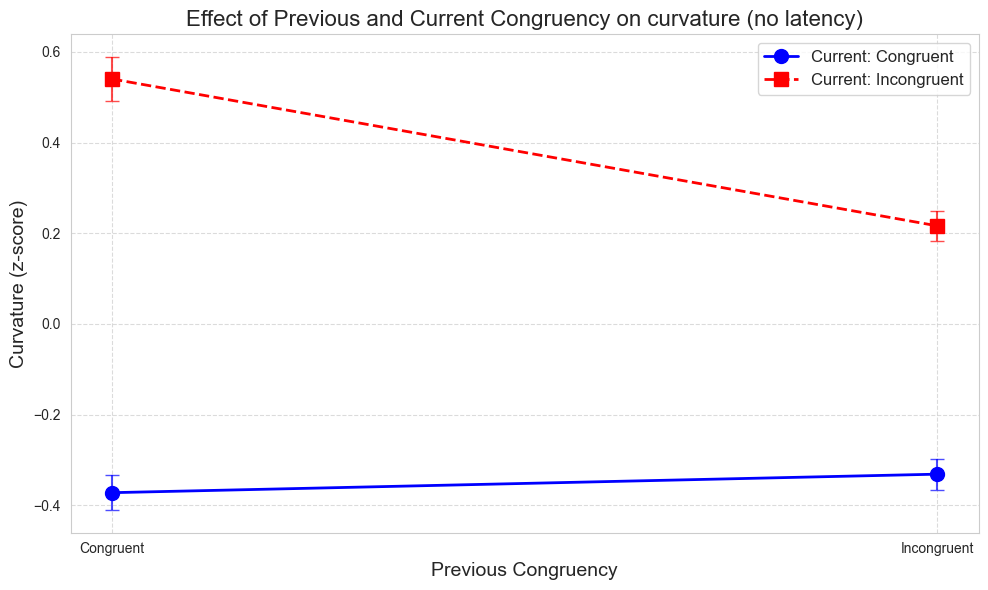

In [18]:
visualize_anova_results(aggregated_df_no_latency, "curvature_normalized", "Curvature (z-score)", "Effect of Previous and Current Congruency on curvature (no latency)")

## Für Gruppe mit Latenz

In [19]:
aov_results_with_latency = pg.rm_anova(dv='curvature_normalized', 
                            within=['currentcongruency', 'previouscongruency'], 
                            subject='participant_num', 
                            data=df_with_latency, 
                            detailed=True)

print(aov_results_with_latency[['Source', 'F', 'p-unc', 'ng2']])

                                   Source          F         p-unc       ng2
0                       currentcongruency  77.073656  2.692108e-07  0.803964
1                      previouscongruency  11.337513  4.233976e-03  0.067111
2  currentcongruency * previouscongruency  28.368569  8.472570e-05  0.162242


c:\Users\m_uel\source\repos\continuousSimonTask\venv\Lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\m_uel\source\repos\continuousSimonTask\venv\Lib\site-packages\pingouin\distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


In [20]:
currentcongruency_row = aov_results_with_latency[aov_results_with_latency['Source'] == 'currentcongruency']
previouscongruency_row = aov_results_with_latency[aov_results_with_latency['Source'] == 'previouscongruency']
currentxprevious_row = aov_results_with_latency[aov_results_with_latency['Source'] == 'currentcongruency * previouscongruency']

print("\nANOVA Results - Congruency on Curvature (with latency):")
print("-" * 50)
print(f"Current Congruency Effect: F(1, 15) = {currentcongruency_row['F'].values[0]:.2f}, p = {currentcongruency_row['p-unc'].values[0]:.8f}, ng^2 = {currentcongruency_row['ng2'].values[0]:.2f}")
print(f"Previous Congruency Effect: F(1, 15) = {previouscongruency_row['F'].values[0]:.2f}, p = {previouscongruency_row['p-unc'].values[0]:.8f}, ng^2 = {previouscongruency_row['ng2'].values[0]:.2f}")
print(f"Interaction Effect: F(1, 15) = {currentxprevious_row['F'].values[0]:.2f}, p = {currentxprevious_row['p-unc'].values[0]:.8f}, ng^2 = {currentxprevious_row['ng2'].values[0]:.2f}")


ANOVA Results - Congruency on Curvature (with latency):
--------------------------------------------------
Current Congruency Effect: F(1, 15) = 77.07, p = 0.00000027, ng^2 = 0.80
Previous Congruency Effect: F(1, 15) = 11.34, p = 0.00423398, ng^2 = 0.07
Interaction Effect: F(1, 15) = 28.37, p = 0.00008473, ng^2 = 0.16


In [21]:
aggregated_df_with_latency = df_with_latency.groupby(['participant_num', 'currentcongruency', 'previouscongruency'])['curvature_normalized'].mean().reset_index()
condition_means_with_latency = aggregated_df_with_latency.groupby(['currentcongruency', 'previouscongruency'])['curvature_normalized'].mean().reset_index()

print("\nAnova results for congruency (current/previous) on curvature (No latency):")
print("\nMean Reaction Times for Each Condition:")
print("-" * 50)
for _, row in condition_means_with_latency.iterrows():
    current = "Congruent" if row['currentcongruency'] == 1 else "Incongruent"
    previous = "Congruent" if row['previouscongruency'] == 1 else "Incongruent"
    print(f"Previous: {previous:<11} Current: {current:<11} Mean curvature: {row['curvature_normalized']:.2f}")

# Calculate main effects
print("\nMain Effects:")
print("-" * 50)
current_mean_curvature = condition_means_with_latency.groupby('currentcongruency')['curvature_normalized'].mean()
print(f"Current Congruency curvatures: Incongruent: {current_mean_curvature[0]:.2f}, Congruent: {current_mean_curvature[1]:.2f}")
print(f"Congruency curvature diff: {current_mean_curvature[0] - current_mean_curvature[1]:.2f}")
print(f"Statistical Significance: p = {currentcongruency_row['F'].values[0]:.8f}\n")

previous_mean_curvature = condition_means_with_latency.groupby('previouscongruency')['curvature_normalized'].mean()
print(f"Previous Congruency curvatures: Incongruent: {previous_mean_curvature[0]:.2f}, Congruent: {previous_mean_curvature[1]:.2f}")
print(f"Previous Trial curvature diff: {previous_mean_curvature[0] - previous_mean_curvature[1]:.2f}")
print(f"Statistical Significance: p = {previouscongruency_row['F'].values[0]:.6f}\n")

cc_curvature_after_c = condition_means_with_latency[condition_means_with_latency['previouscongruency']==1]['curvature_normalized'].values
cc_curvature_after_c = cc_curvature_after_c[0] - cc_curvature_after_c[1] if len(cc_curvature_after_c) > 1 else "N/A"

cc_curvature_after_ic = condition_means_with_latency[condition_means_with_latency['previouscongruency']==0]['curvature_normalized'].values
cc_curvature_after_ic = cc_curvature_after_ic[0] - cc_curvature_after_ic[1] if len(cc_curvature_after_ic) > 1 else "N/A"

print("Interaction:")
print("-" * 50)
print(f"Congruency curvature diff after congruent trial: {cc_curvature_after_c:.2f}")
print(f"Congruency curvature diff after incongruent trial: {cc_curvature_after_ic:.2f}")
print(f"Difference in curvatures: {cc_curvature_after_c - cc_curvature_after_ic:.2f}")
print(f"Statistical Significance: p = {currentxprevious_row['F'].values[0]:.6f}")



Anova results for congruency (current/previous) on curvature (No latency):

Mean Reaction Times for Each Condition:
--------------------------------------------------
Previous: Incongruent Current: Incongruent Mean curvature: 0.21
Previous: Congruent   Current: Incongruent Mean curvature: 0.43
Previous: Incongruent Current: Congruent   Mean curvature: -0.27
Previous: Congruent   Current: Congruent   Mean curvature: -0.32

Main Effects:
--------------------------------------------------
Current Congruency curvatures: Incongruent: 0.32, Congruent: -0.29
Congruency curvature diff: 0.61
Statistical Significance: p = 77.07365551

Previous Congruency curvatures: Incongruent: -0.03, Congruent: 0.05
Previous Trial curvature diff: -0.08
Statistical Significance: p = 11.337513

Interaction:
--------------------------------------------------
Congruency curvature diff after congruent trial: 0.75
Congruency curvature diff after incongruent trial: 0.48
Difference in curvatures: 0.27
Statistical Sig

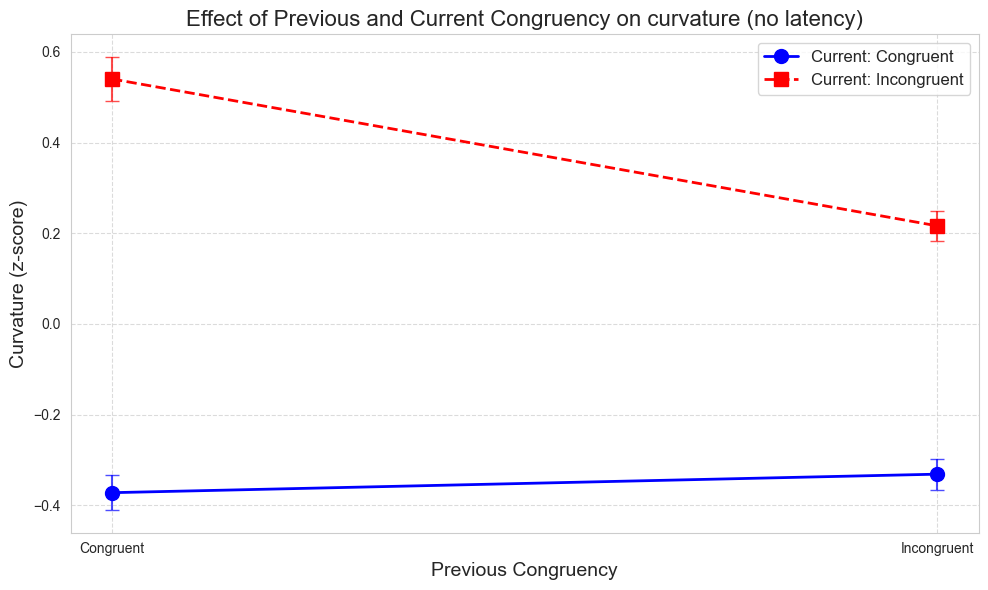

In [22]:
visualize_anova_results(aggregated_df_no_latency, "curvature_normalized", "Curvature (z-score)", "Effect of Previous and Current Congruency on curvature (no latency)")

## Darstellen der 2 Conditions in einem Plot

In [23]:
def visualize_anova_results_combined_single_plot(df1, df2, key, key_label, title, showErrorBars=True):
    grouped_data_df1 = df1.groupby(['previouscongruency', 'currentcongruency'])[key].mean().reset_index()
    grouped_data_df2 = df2.groupby(['previouscongruency', 'currentcongruency'])[key].mean().reset_index()

    fig, ax = plt.subplots(figsize=(10, 7))  
    sns.set_style('whitegrid')

    markers = ['o', 's']
    linestyles = ['-', '--']
    colors = ['darkblue', 'royalblue', 'darkred', 'firebrick']
    labels = ['Current: Congruent (With latency)', 'Current: Incongruent (With latency)', 
              'Current: Congruent (Without latency)', 'Current: Incongruent (Without latency)']
    x_mapping = {1: 0, 0: 1}
    
    for i, current in enumerate([1, 0]):
        subset = grouped_data_df1[grouped_data_df1['currentcongruency'] == current]
        subset = subset.sort_values('previouscongruency', ascending=False)
        x_values = [x_mapping[prev] for prev in subset['previouscongruency']]

        ax.plot(x_values, subset[key], 
                marker=markers[i], linestyle=linestyles[i], color=colors[i], 
                linewidth=2, markersize=10, label=labels[i])

    for i, current in enumerate([1, 0]):
        subset = grouped_data_df2[grouped_data_df2['currentcongruency'] == current]
        subset = subset.sort_values('previouscongruency', ascending=False)
        x_values = [x_mapping[prev] for prev in subset['previouscongruency']]

        ax.plot(x_values, subset[key], 
                marker=markers[i], linestyle=linestyles[i], color=colors[i+2], 
                linewidth=2, markersize=10, label=labels[i+2])
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Congruent', 'Incongruent'])
    ax.set_xlabel('Previous Congruency', fontsize=14)
    ax.set_ylabel(key_label, fontsize=14)
    ax.set_title(f'{title}', fontsize=16)

    if showErrorBars:
        for i, current in enumerate([1, 0]):
            for j, previous in enumerate([1, 0]):
                subset = df1[(df1['currentcongruency'] == current) & (df1['previouscongruency'] == previous)]
                mean = subset[key].mean()
                se = subset[key].std() / np.sqrt(len(subset))
                ax.errorbar(x_mapping[previous], mean, yerr=se, fmt='none', capsize=5, 
                           ecolor=colors[i], alpha=0.7)

        for i, current in enumerate([1, 0]):
            for j, previous in enumerate([1, 0]):
                subset = df2[(df2['currentcongruency'] == current) & (df2['previouscongruency'] == previous)]
                mean = subset[key].mean()
                se = subset[key].std() / np.sqrt(len(subset))
                ax.errorbar(x_mapping[previous], mean, yerr=se, fmt='none', capsize=5, 
                           ecolor=colors[i+2], alpha=0.7)


    ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), borderaxespad=0, ncol=2, fontsize=15)

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.25) 
    plt.grid(True, linestyle='--', alpha=0.7)


    plt.show()

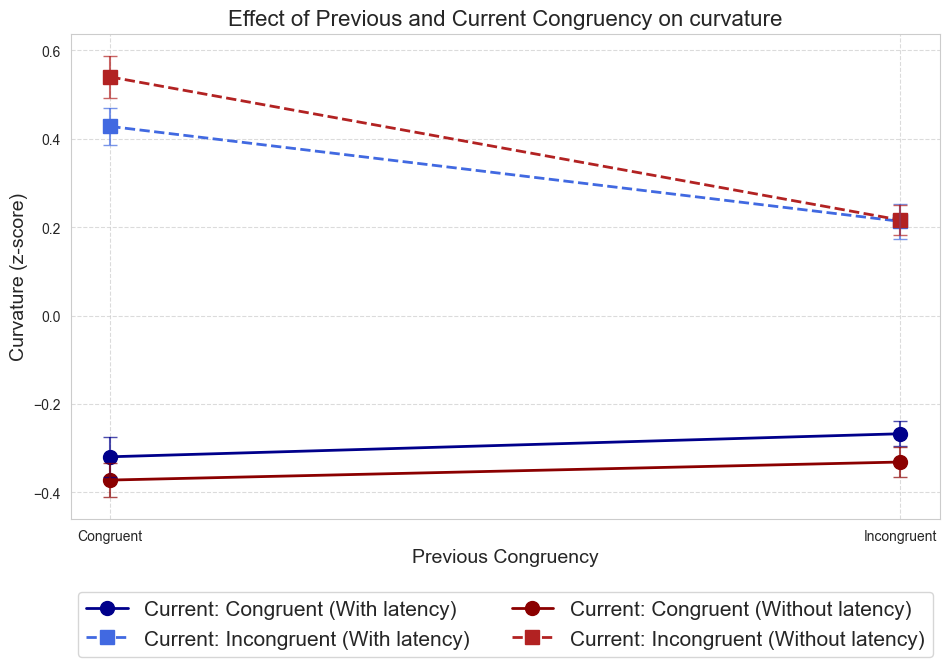

In [24]:
visualize_anova_results_combined_single_plot(aggregated_df_with_latency, aggregated_df_no_latency, "curvature_normalized", "Curvature (z-score)", "Effect of Previous and Current Congruency on curvature")

## Heatmaps der Trajectories

In [25]:
def mirror_trajectories(row):
    if row["currentdirection"] == 1:
        row["xpos"] = [-x for x in row["xpos"]]
    return row

In [26]:
def simple_traj(df):
    df= df.apply(mirror_trajectories, axis=1)
    dfs = {participant: sub_df for participant, sub_df in df.groupby("participant_num")}
 
    for participant, grouped_mouse_data in dfs.items():

        all_xpos = [x for trial in grouped_mouse_data["xpos"] for x in trial]
        all_ypos = [y for trial in grouped_mouse_data["ypos"] for y in trial]

        # 2D-Histogramm erstellen (Heatmap-Daten)
        heatmap_data, x_edges, y_edges = np.histogram2d(
            all_xpos, all_ypos, bins=50  # 50x50 Raster
        )

        # Heatmap darstellen
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            heatmap_data.T,  # Transponieren, da np.histogram2d die Achsen vertauscht
            cmap="viridis",  # Farbpalette (z. B. 'viridis', 'plasma', 'coolwarm')
            xticklabels=False, yticklabels=False  # Achsenbeschriftung entfernen
        )
        plt.title("Heatmap der Mausbewegungen")
        plt.xlabel("X-Position")
        plt.ylabel("Y-Position")
        plt.show()

def simple_traj_si(df):
    df = df.apply(mirror_trajectories, axis=1)
 
    all_xpos = [x for trial in df["xpos"] for x in trial]
    all_ypos = [y for trial in df["ypos"] for y in trial]

    print(len(all_ypos))
    # 2D-Histogramm erstellen (Heatmap-Daten)
    heatmap_data, x_edges, y_edges = np.histogram2d(
        all_xpos, all_ypos, bins=50  # 50x50 Raster
    )

    # Heatmap darstellen
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        heatmap_data.T,  # Transponieren, da np.histogram2d die Achsen vertauscht
        cmap="viridis",  # Farbpalette (z. B. 'viridis', 'plasma', 'coolwarm')
        xticklabels=False, yticklabels=False  # Achsenbeschriftung entfernen
    )
    plt.title("Heatmap der Mausbewegungen")
    plt.xlabel("X-Position")
    plt.ylabel("Y-Position")
    plt.show()

961000


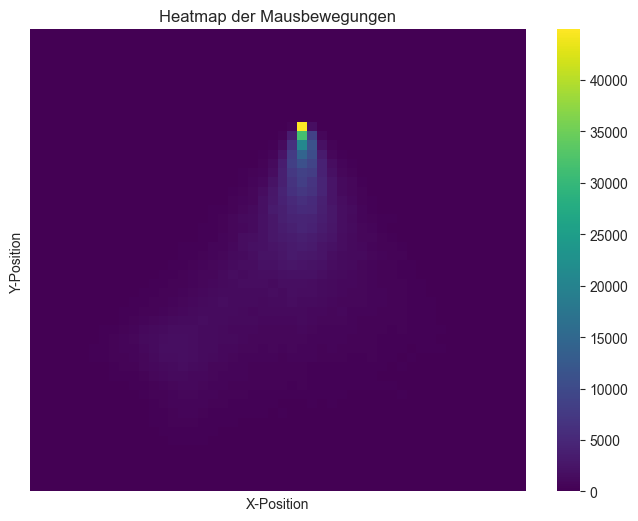

In [27]:
simple_traj_si(df_no_latency)

In [28]:

df_no_latency.head()

,trialnumber,blocknumber,success,reactiontime,currentcongruency,currentdirection,currentlocation,previouscongruency,previousdirection,previouslocation,participant_num,timedifference,xpos,ypos,latency,curvature,curvature_normalized
0,1,3,1,396,0,1,0,0,1,0,1,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, 0.0, 0.0, 0.0, -0.38383838383838426, -1....","[0.0, 11.171717171717173, 22.343434343434346, ...",1,188.944501,0.446942
1,2,3,1,402,0,0,1,0,1,0,1,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, 6.464646464646465, 14.161616161616163, 2...","[0.0, 4.040404040404041, 9.92929292929293, 16....",1,207.457422,0.666383
2,3,3,1,396,0,0,1,0,0,1,1,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, 1.595959595959596, 3.191919191919192, 4....","[0.0, 5.5858585858585865, 12.363636363636365, ...",1,308.205586,1.860596
3,4,3,1,266,1,0,0,0,0,1,1,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, -1.0707070707070707, -2.141414141414142,...","[0.0, 2.676767676767677, 5.636363636363638, 10...",1,62.799321,-1.048313
4,5,3,1,496,1,1,1,1,0,0,1,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, -2.0, -2.0, -4.0, -4.0, -5.0, -5.0, -7.0...","[0.0, 1.0, 4.0, 5.0, 8.0, 9.0, 12.0, 13.0, 15....",1,147.486669,-0.044476


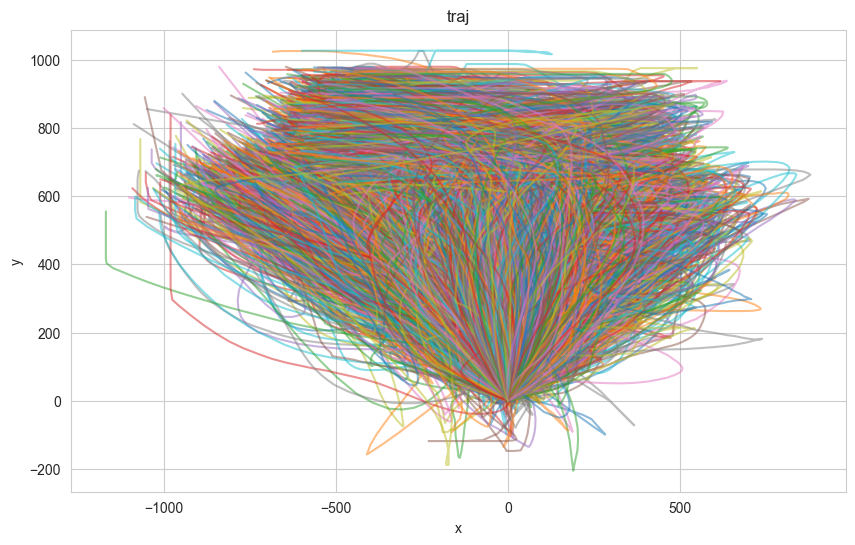

In [29]:
df_no_latency_mirrored = df_no_latency.apply(mirror_trajectories, axis=1)
df_with_latency_mirrored = df_with_latency.apply(mirror_trajectories, axis=1)
plt.figure(figsize=(10, 6))

for index, row in df_with_latency_mirrored.iterrows():
    plt.plot(row['xpos'], row['ypos'], alpha=0.5)

plt.xlabel("x")
plt.ylabel("y")
plt.title("traj")

plt.show()

Erste x-Werte pro Trajektorie: 0.0
Erste x-Werte pro Trajektorie: -0.0
Erste x-Werte pro Trajektorie: -0.0
Erste x-Werte pro Trajektorie: -0.0


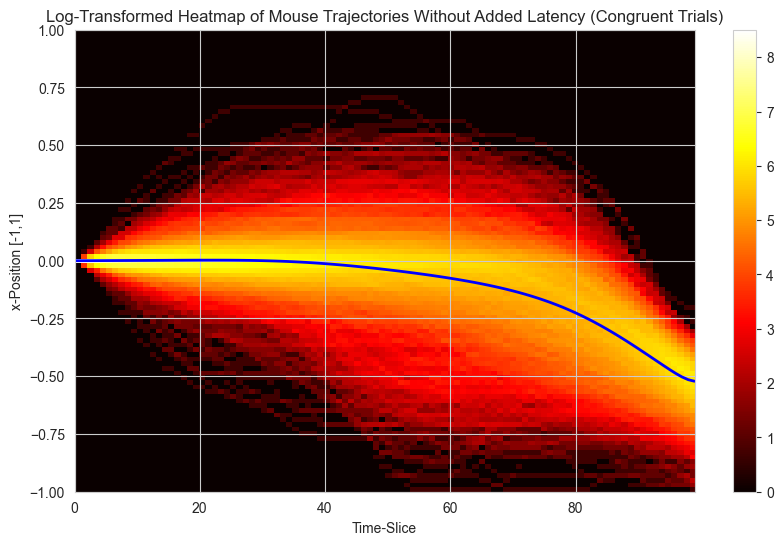

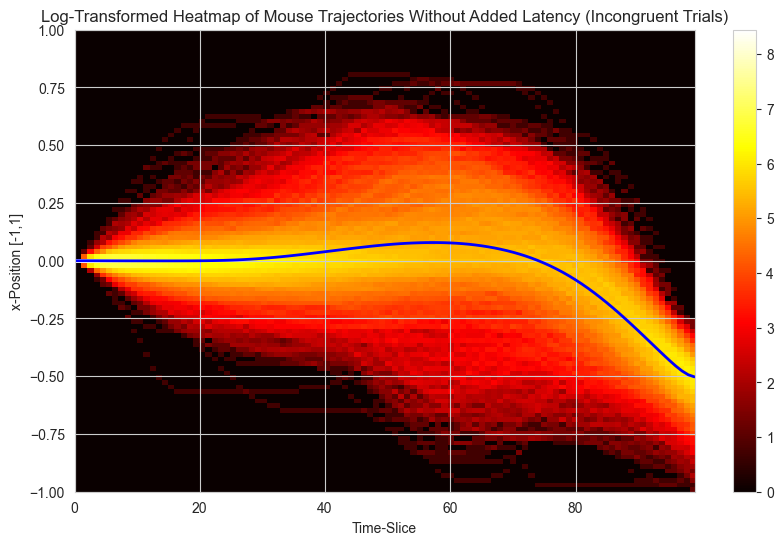

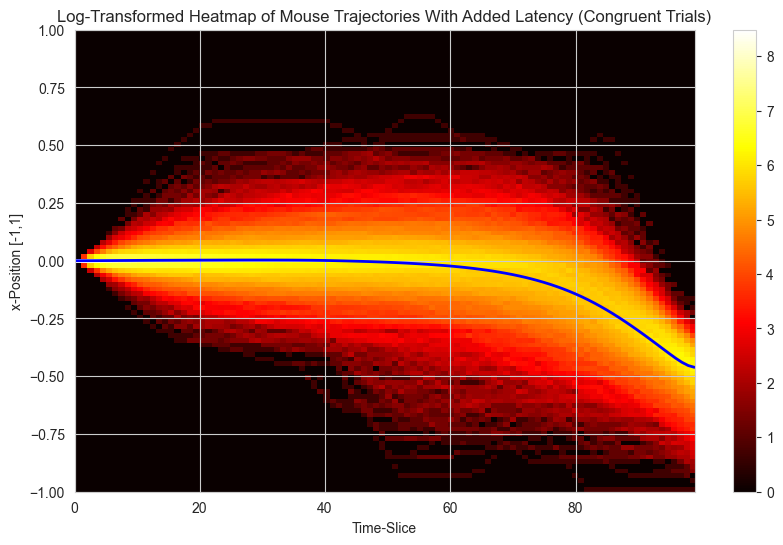

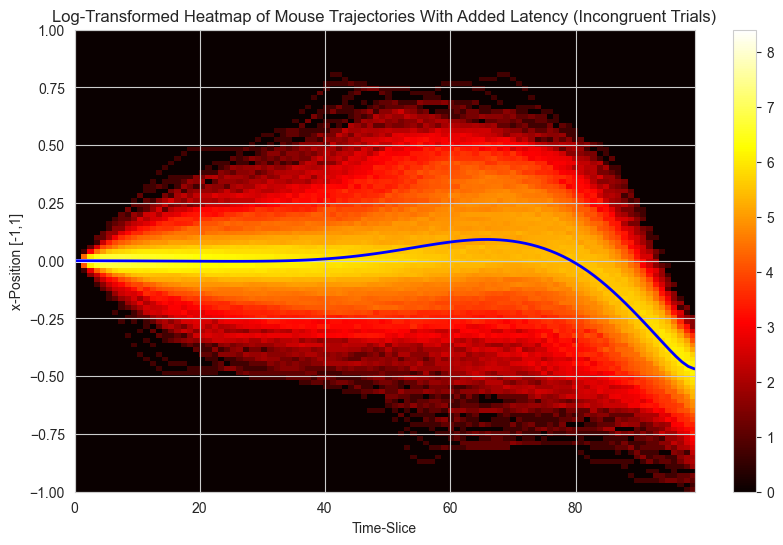

In [52]:
from scipy.ndimage import gaussian_filter1d
# Anzahl der Time-Slices (100 pro Trajektorie)
num_slices = 100
y_bins = np.linspace(-1, 1, 100)  # 100 Y-Bins für die Normalisierung

# **Daten nach Kongruenz splitten**
no_latency_congruent_trials = df_no_latency_mirrored[df_no_latency_mirrored['currentcongruency'] == 1]
no_latency_incongruent_trials = df_no_latency_mirrored[df_no_latency_mirrored['currentcongruency'] == 0]

# **Daten nach Kongruenz splitten**
with_latency_congruent_trials = df_with_latency_mirrored[df_with_latency_mirrored['currentcongruency'] == 1]
with_latency_incongruent_trials = df_with_latency_mirrored[df_with_latency_mirrored['currentcongruency'] == 0]

# Funktion zum Erstellen einer Heatmap mit Modalkurve
def plot_heatmap(data, title, ax=None):
    # X-Positionswerte aus den Daten extrahieren
    x_values = np.array(data["xpos"].tolist())  # Shape: (n_trials, 100)

    # **X-Werte auf [-1,1] normalisieren**
    max_abs_x = np.max(np.abs(x_values))  # Größten absoluten Wert finden
    x_values = x_values / max_abs_x 
    #print("x_min:", x_min, "x_max:", x_max)
    print("Erste x-Werte pro Trajektorie:", x_values[0][0])
    # **2D-Histogramm erstellen (Häufigkeitsverteilung)**
    heatmap, _, _ = np.histogram2d(
        np.tile(np.arange(num_slices), x_values.shape[0]),  # Zeitachse für alle Trials
        x_values.flatten(),  # Alle X-Werte aus allen Trajektorien
        bins=[np.arange(num_slices + 1), y_bins]
    )

    # **Log-Transformation für bessere Sichtbarkeit**
    heatmap_log = np.log1p(heatmap)

    # **Modalkurve bestimmen (häufigste X-Position pro Time-Slice)**
    # modal_indices = np.argmax(heatmap, axis=1)
    # modal_y = y_bins[modal_indices]
    y_centers = (y_bins[:-1] + y_bins[1:]) / 2
    modal_y = np.sum(heatmap * y_centers[None, :], axis=1) / np.sum(heatmap, axis=1) 
    # **Glättung der Modalkurve**
    modal_y_smooth = gaussian_filter1d(modal_y, sigma=2)

    # **Plot erstellen**
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))  # Falls kein ax übergeben wird, wird ein neuer Plot erstellt.
        
    im = ax.imshow(
        heatmap_log.T,
        origin="lower",
        extent=[0, num_slices - 1, -1, 1],  # Achsen anpassen
        cmap="hot",
        aspect="auto"
    )

    # **Referenz-Trajektorie einzeichnen**
    ax.plot(np.arange(num_slices), modal_y_smooth, color="blue", linewidth=2)

    # **Farblegende und Labels**
    ax.set_title(title)
    ax.set_xlabel("Time-Slice")
    ax.set_ylabel("x-Position [-1,1]")

    # **Colorbar hinzufügen**
    if ax is not None:  # Stelle sicher, dass ax existiert und eine Colorbar hinzugefügt wird
        if 'fig' in locals():  # Nur wenn fig lokal definiert ist, füge die colorbar hinzu
            fig.colorbar(im, ax=ax)
        else:
            ax.figure.colorbar(im, ax=ax)


# **Heatmap für kongruente Trials**
plot_heatmap(no_latency_congruent_trials, "Log-Transformed Heatmap of Mouse Trajectories Without Added Latency (Congruent Trials)", None)

# **Heatmap für inkongruente Trials**
plot_heatmap(no_latency_incongruent_trials, "Log-Transformed Heatmap of Mouse Trajectories Without Added Latency (Incongruent Trials)", None)

# **Heatmap für kongruente Trials**
plot_heatmap(with_latency_congruent_trials, "Log-Transformed Heatmap of Mouse Trajectories With Added Latency (Congruent Trials)", None)

# **Heatmap für inkongruente Trials**
plot_heatmap(with_latency_incongruent_trials, "Log-Transformed Heatmap of Mouse Trajectories With Added Latency (Incongruent Trials)", None)

Erste x-Werte pro Trajektorie: 0.0
Erste x-Werte pro Trajektorie: -0.0
Erste x-Werte pro Trajektorie: -0.0
Erste x-Werte pro Trajektorie: -0.0


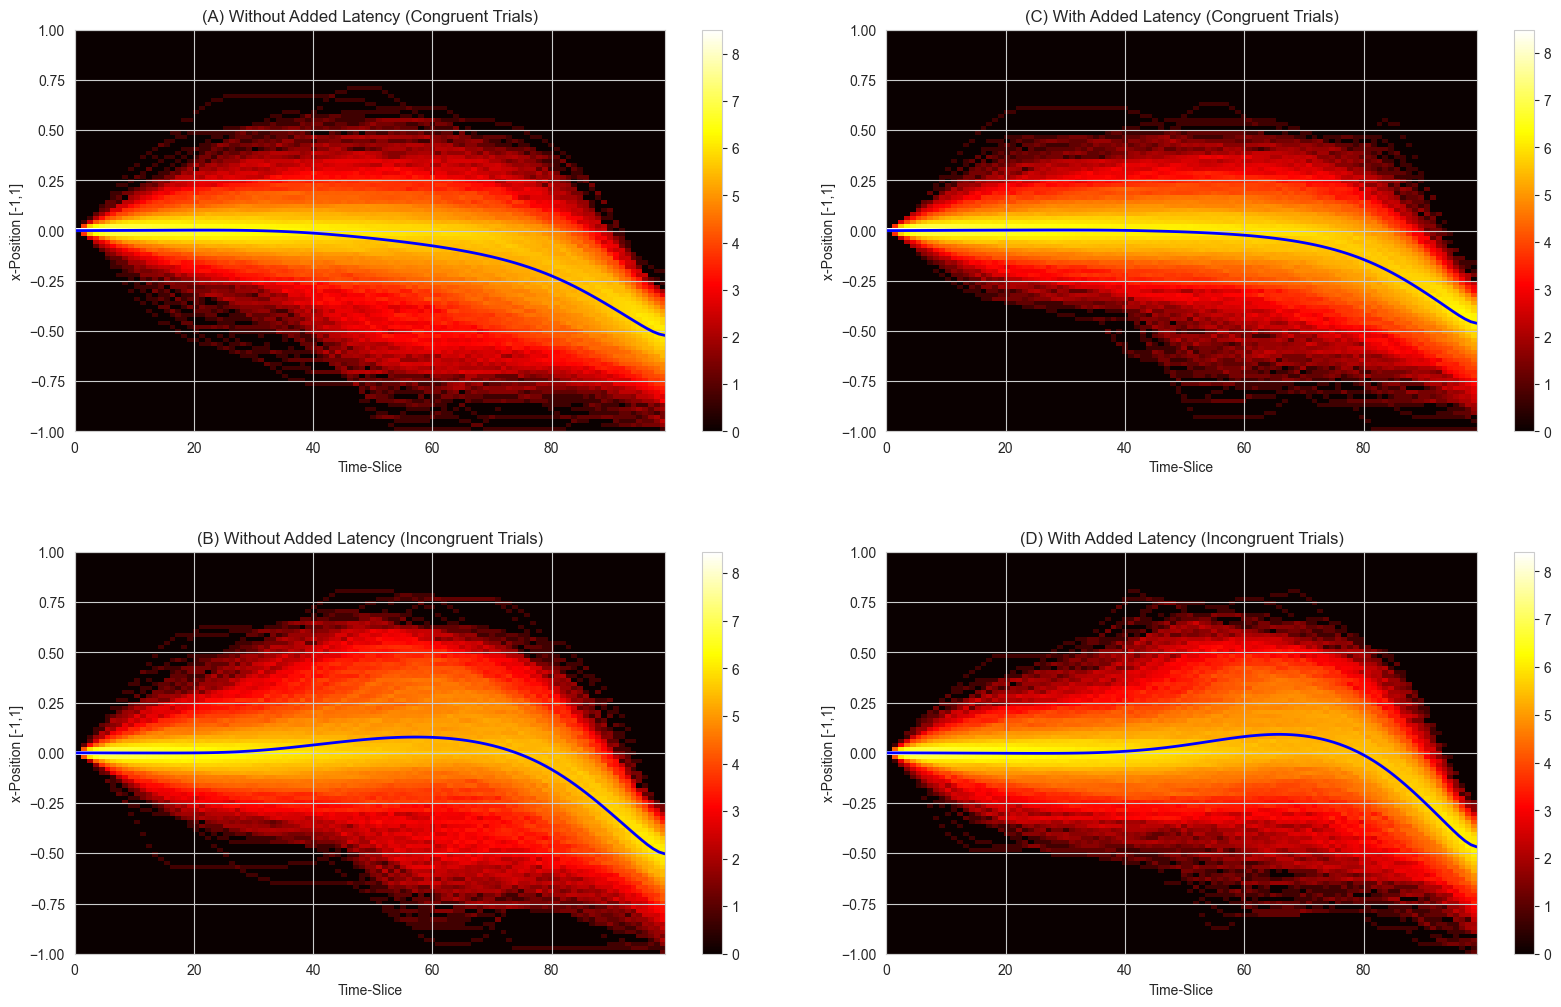

In [53]:
# Erstelle eine Figur mit zwei Zeilen und zwei Spalten (2x2)
fig, ax = plt.subplots(2, 2, figsize=(20, 12))

# **Heatmap für kongruente Trials ohne Latenz (oben links)**
plot_heatmap(no_latency_congruent_trials, 
             "(A) Without Added Latency (Congruent Trials)", 
             ax=ax[0, 0])

# **Heatmap für inkongruente Trials ohne Latenz (oben rechts)**
plot_heatmap(no_latency_incongruent_trials, 
             "(B) Without Added Latency (Incongruent Trials)", 
             ax=ax[1, 0])

# **Heatmap für kongruente Trials mit Latenz (unten links)**
plot_heatmap(with_latency_congruent_trials, 
             "(C) With Added Latency (Congruent Trials)", 
             ax=ax[0, 1])

# **Heatmap für inkongruente Trials mit Latenz (unten rechts)**
plot_heatmap(with_latency_incongruent_trials, 
             "(D) With Added Latency (Incongruent Trials)", 
             ax=ax[1, 1])

# Anpassung der Subplot-Abstände für eine bessere Darstellung
plt.subplots_adjust(wspace=0.1, hspace=0.3)

# Zeige die Plots an
plt.show()


In [32]:
def create_trajectory_heatmaps(df):

    df= df.apply(mirror_trajectories, axis=1)
    # Make sure xpos is properly parsed from string representation to actual list if needed
    # If xpos is stored as a string representation of a list, convert it to an actual list
    if isinstance(df['xpos'].iloc[0], str):
        df['xpos'] = df['xpos'].apply(lambda x: eval(x))
    
    # Number of time slices (assumed to be 100 as mentioned)
    n_time_slices = 100
    
    # Create bins for x-positions (normalized between -1 and 1)
    n_bins = 50  # Number of spatial bins
    bin_edges = np.linspace(-1, 1, n_bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Split data by congruency
    congruent_trials = df[df['currentcongruency'] == 1]
    incongruent_trials = df[df['currentcongruency'] == 0]

    # Initialize matrices to store counts for each bin and time slice
    congruent_counts = np.zeros((n_bins, n_time_slices))
    incongruent_counts = np.zeros((n_bins, n_time_slices))
    
    # Process congruent trials
    for _, trial in congruent_trials.iterrows():
        xpos_values = trial['xpos']
        for t in range(n_time_slices):
            # Find the bin for this x-position
            bin_idx = np.digitize(xpos_values[t], bin_edges) - 1
            # Ensure the index is within bounds
            if 0 <= bin_idx < n_bins:
                congruent_counts[bin_idx, t] += 1
    
    # Process incongruent trials
    for _, trial in incongruent_trials.iterrows():
        xpos_values = trial['xpos']
        for t in range(n_time_slices):
            # Find the bin for this x-position
            bin_idx = np.digitize(xpos_values[t], bin_edges) - 1
            # Ensure the index is within bounds
            if 0 <= bin_idx < n_bins:
                incongruent_counts[bin_idx, t] += 1
    
    # Convert counts to probabilities
    congruent_probs = congruent_counts / congruent_counts.sum(axis=0, keepdims=True)
    incongruent_probs = incongruent_counts / incongruent_counts.sum(axis=0, keepdims=True)
    
    # Log transform probabilities (adding a small value to avoid log(0))
    epsilon = 1e-10
    congruent_log_probs = np.log(congruent_probs + epsilon)
    incongruent_log_probs = np.log(incongruent_probs + epsilon)
    
    # Create the plots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    
    # Heatmap for congruent trials
    sns.heatmap(congruent_log_probs, ax=ax1, cmap='viridis', 
                xticklabels=20, yticklabels=10)
    ax1.set_title('Log Probability Distribution - Congruent Trials')
    ax1.set_xlabel('Time Slice')
    ax1.set_ylabel('X-Position')
    
    # Fix for the ValueError - create matching number of ticks and labels
    num_yticks = 11
    ytick_positions = np.linspace(0, n_bins, num_yticks)
    ytick_labels = [f'{bin_centers[int(i)]:.2f}' if i < n_bins else '1.00' for i in ytick_positions[:-1]]
    ytick_labels.append('1.00')  # Add the last label manually
    
    ax1.set_yticks(ytick_positions)
    ax1.set_yticklabels(ytick_labels)
    ax1.invert_yaxis()  # To have -1 at bottom, 1 at top
    
    # Heatmap for incongruent trials
    sns.heatmap(incongruent_log_probs, ax=ax2, cmap='viridis', 
                xticklabels=20, yticklabels=10)
    ax2.set_title('Log Probability Distribution - Incongruent Trials')
    ax2.set_xlabel('Time Slice')
    ax2.set_ylabel('X-Position')
    
    ax2.set_yticks(ytick_positions)
    ax2.set_yticklabels(ytick_labels)
    ax2.invert_yaxis()  # To have -1 at bottom, 1 at top
    
    plt.tight_layout()
    #plt.savefig('trajectory_heatmaps.png', dpi=300)
    plt.show()
    
    return fig, congruent_log_probs, incongruent_log_probs

C:\Users\m_uel\AppData\Local\Temp\ipykernel_17660\2719595061.py:46: RuntimeWarning: invalid value encountered in divide
  congruent_probs = congruent_counts / congruent_counts.sum(axis=0, keepdims=True)
C:\Users\m_uel\AppData\Local\Temp\ipykernel_17660\2719595061.py:47: RuntimeWarning: invalid value encountered in divide
  incongruent_probs = incongruent_counts / incongruent_counts.sum(axis=0, keepdims=True)


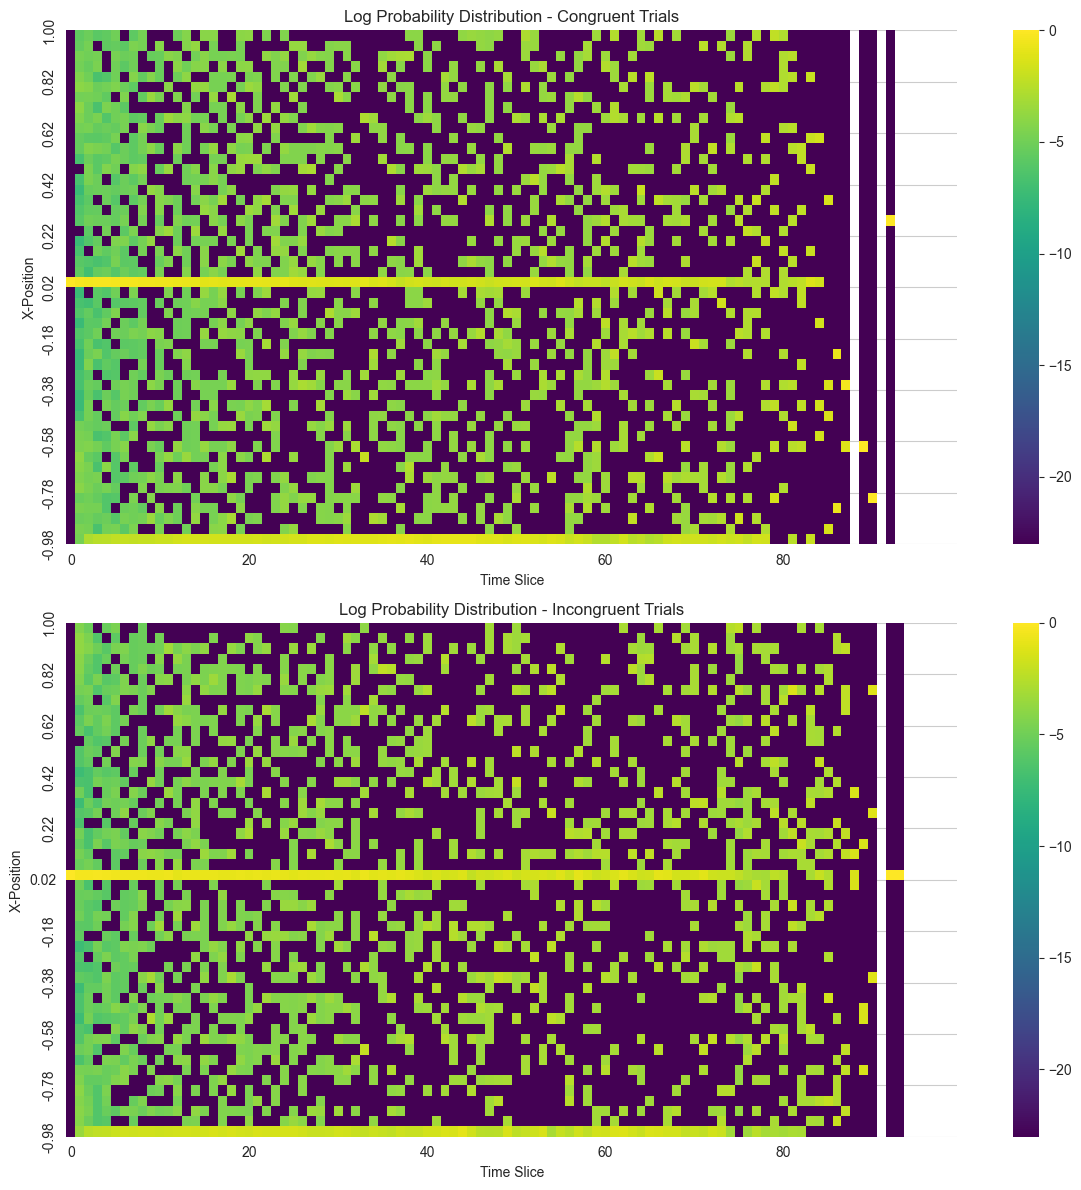

(<Figure size 1200x1200 with 4 Axes>,
 array([[-23.02585093,  -4.81655252,  -2.87298001, ...,          nan,
                  nan,          nan],
        [-23.02585093,  -4.67345168,  -4.85398147, ...,          nan,
                  nan,          nan],
        [-23.02585093,  -5.1842773 ,  -4.98751286, ...,          nan,
                  nan,          nan],
        ...,
        [-23.02585093,  -4.74244455,  -4.98751286, ...,          nan,
                  nan,          nan],
        [-23.02585093,  -5.43559172,  -4.85398147, ...,          nan,
                  nan,          nan],
        [-23.02585093,  -5.5897424 ,  -5.14166354, ...,          nan,
                  nan,          nan]], shape=(50, 100)),
 array([[-23.02585093,  -3.54313087,  -2.4553743 , ...,          nan,
                  nan,          nan],
        [-23.02585093,  -4.14096787,  -5.21221465, ...,          nan,
                  nan,          nan],
        [-23.02585093,  -4.09651611,  -4.65259887, ...,          n

In [33]:
create_trajectory_heatmaps(df_no_latency)